In [2]:
file_prefix <- "ch09.1"
reuse_fit <- T
source("preset.R")

input_file <- "data/TherapeuticTouchData.csv"

# data

In [5]:
data <- read_csv("data/TherapeuticTouchData.csv") %>% 
  mutate(s = factor(s))
stan_data <- list(
  N = nrow(data), 
  K = n_distinct(data$s), 
  y = data$y, 
  s = as.integer(data$s)
)

Parsed with column specification:
cols(
  y = col_double(),
  s = col_character()
)



# fit

In [6]:
fit <- stan(file = "model/ch09.1.stan", data = stan_data, seed = 123, 
            pars = c("kappa_minus2"), include = F, 
            chains = 4, warmup = 1000, iter = 5000, thin = 1)

hash mismatch so recompiling; make sure Stan code ends with a blank line



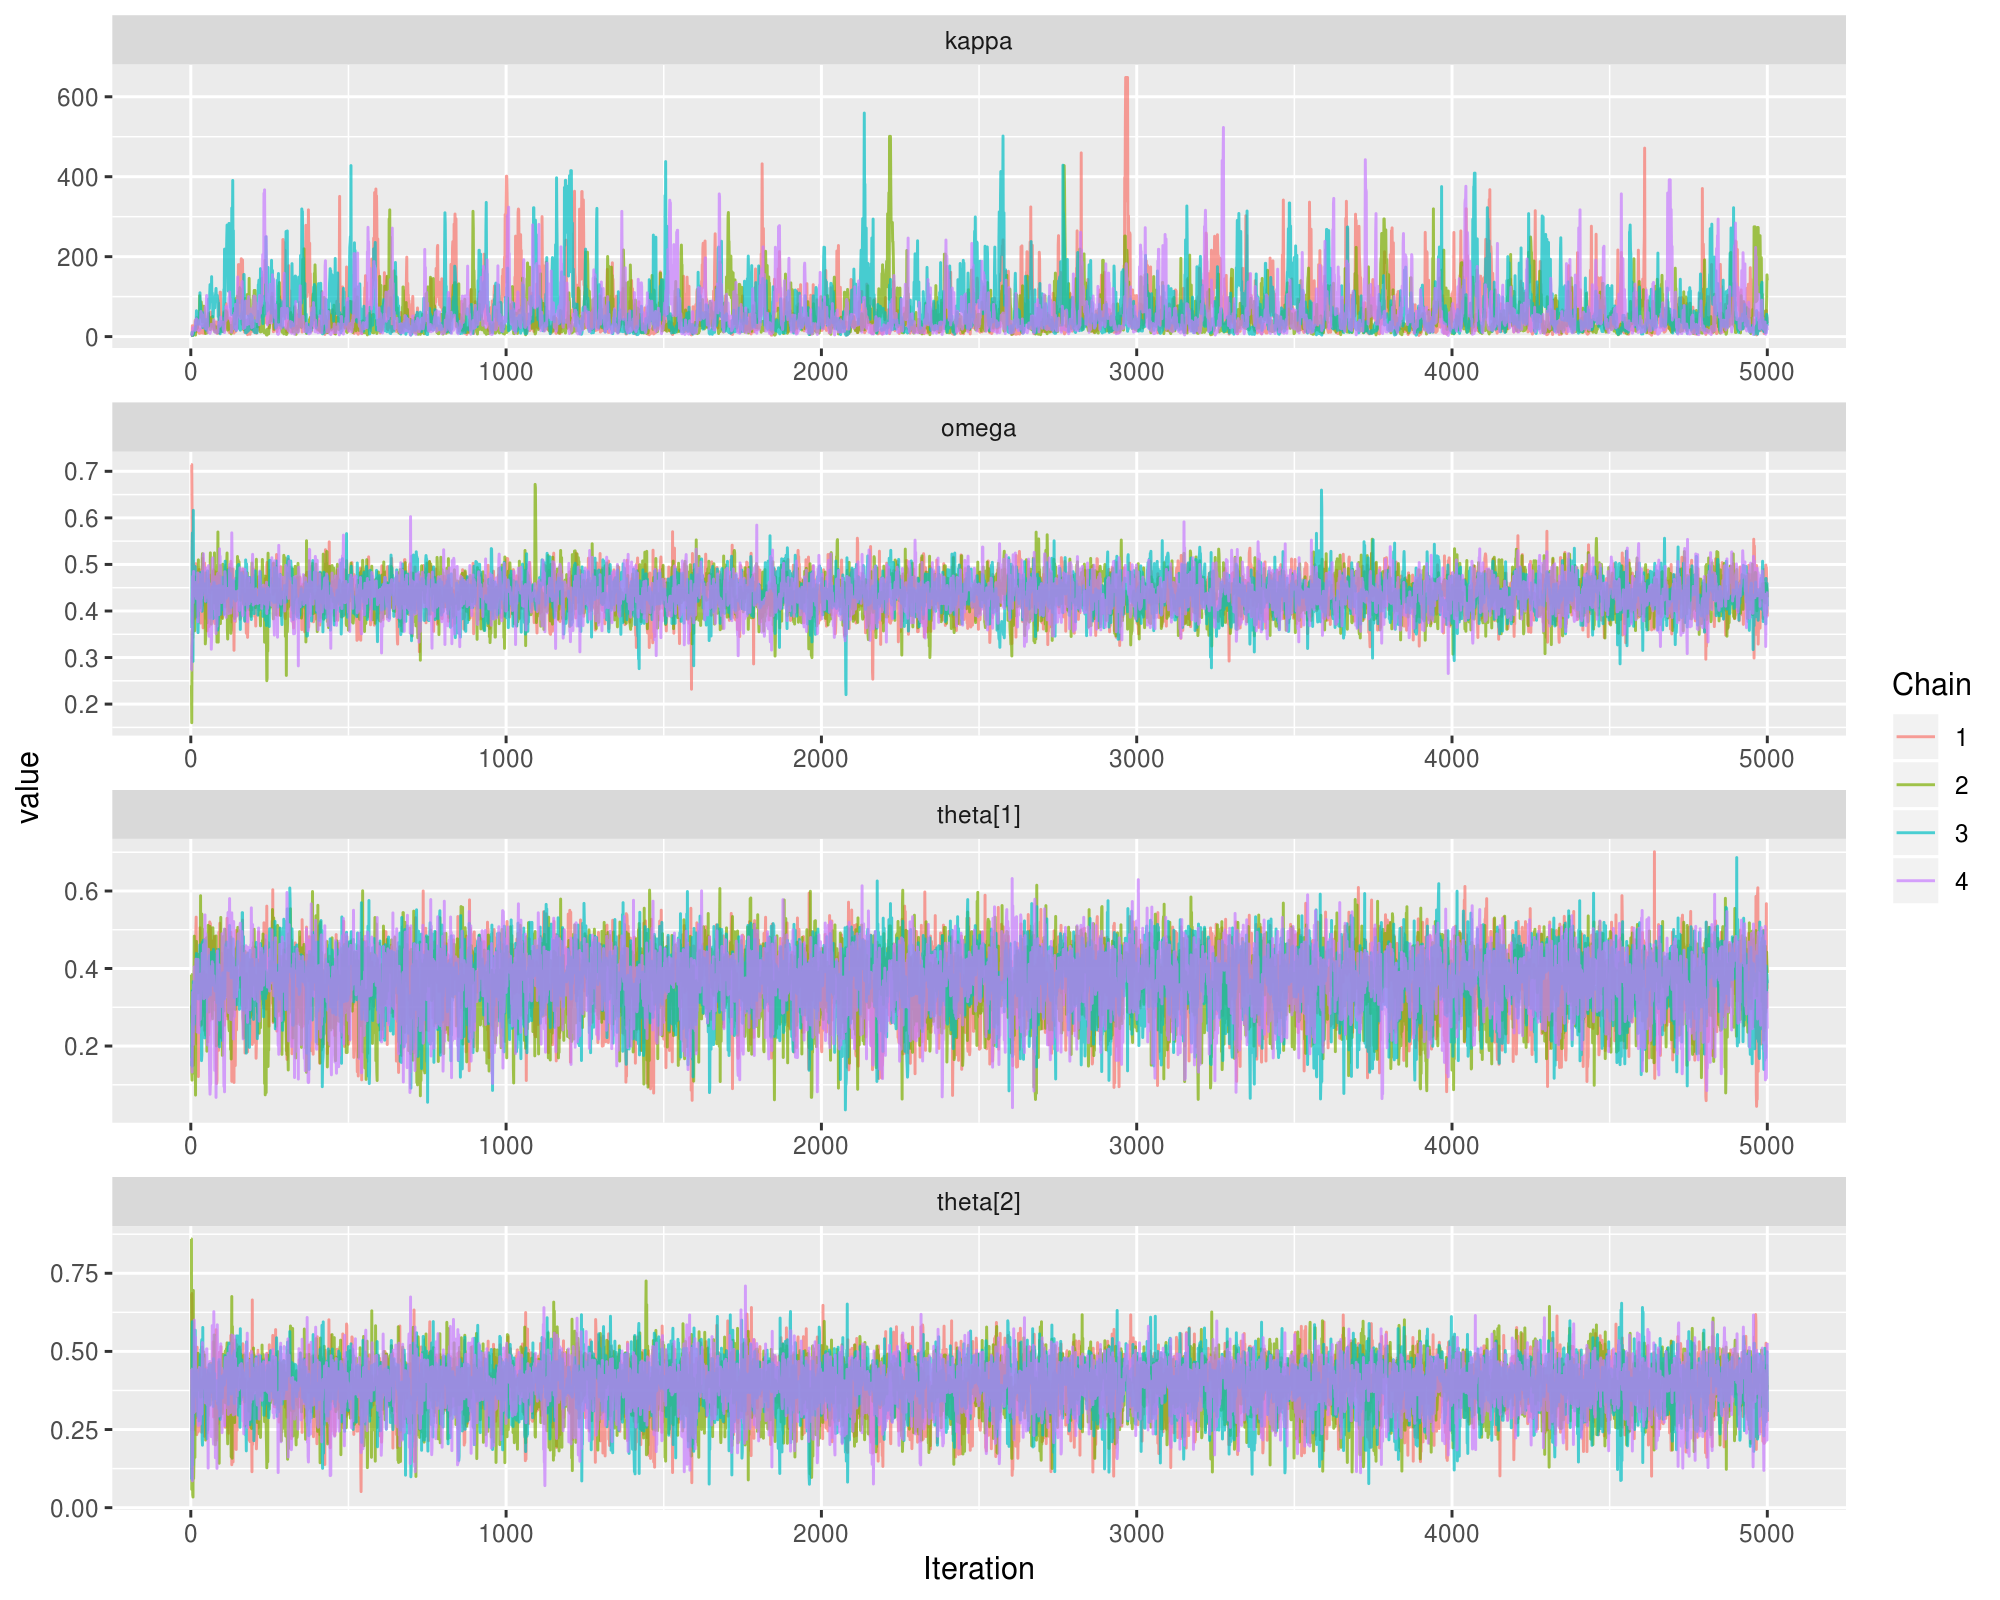

In [12]:
set_plot_size(10, 8)
interests_pars <- "kappa|omega|theta\\[[12]\\]"
ggs_traceplot(ggs(fit, family = interests_pars, inc_warmup = T))

In [9]:
ggmcmc(ggs(fit, family = interests_pars), file = plot_file_name("diag"))

Plotting histograms
Plotting density plots
Plotting traceplots
Plotting running means
Plotting comparison of partial and full chain
Plotting autocorrelation plots
Plotting crosscorrelation plot
Plotting Potential Scale Reduction Factors
Plotting Number of effective independent draws
Plotting Geweke Diagnostic


Joining, by = c("Parameter", "Chain", "part")


Plotting caterpillar plot
Time taken to generate the report: 5.9 seconds.


# result

In [14]:
# result
res <- fit_to_tibble(fit)
mle <- data %>% group_by(s) %>% summarise(m = mean(y))
get_mle <- function(i) (mle %>% filter(s == i))$m

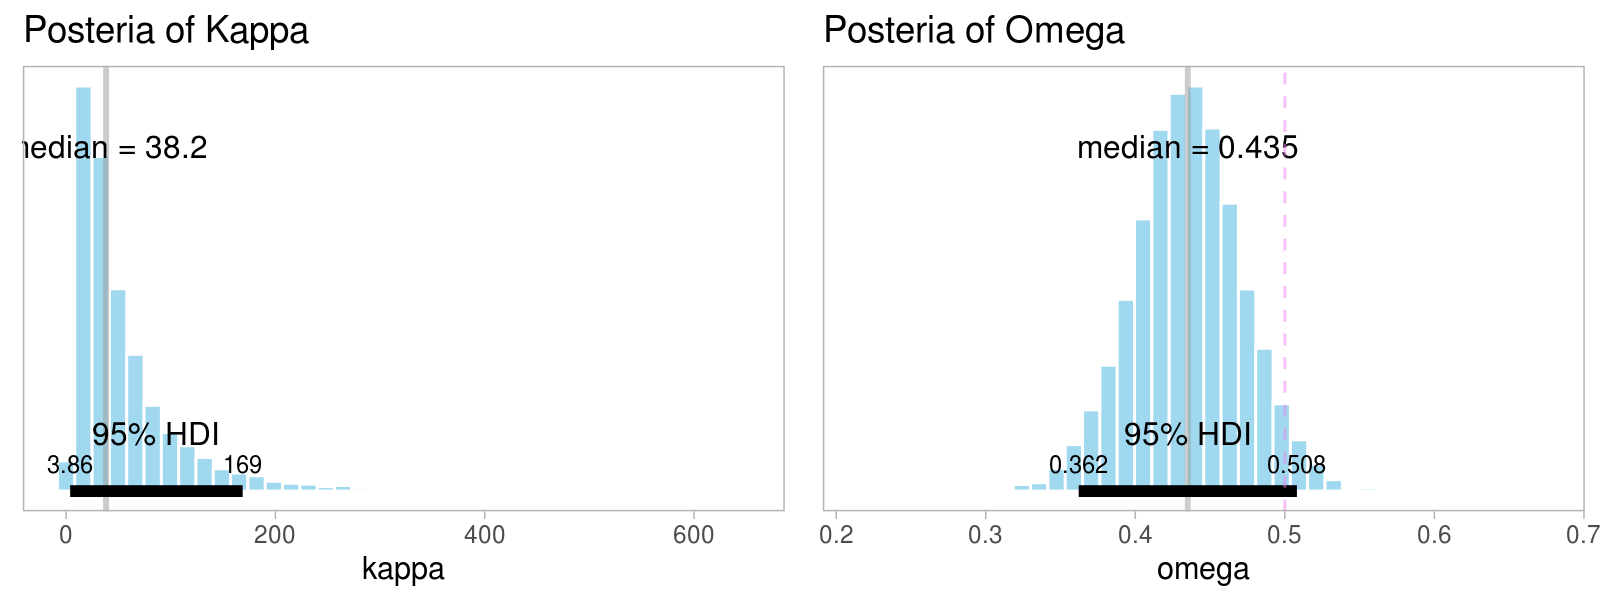

In [18]:
set_plot_size(8, 3)
grid.arrange(
  plot_post(res, "kappa", title = "Posteria of Kappa"), 
  plot_post(res, "omega", comp_val = 0.5, title = "Posteria of Omega"), 
  ncol = 2
)

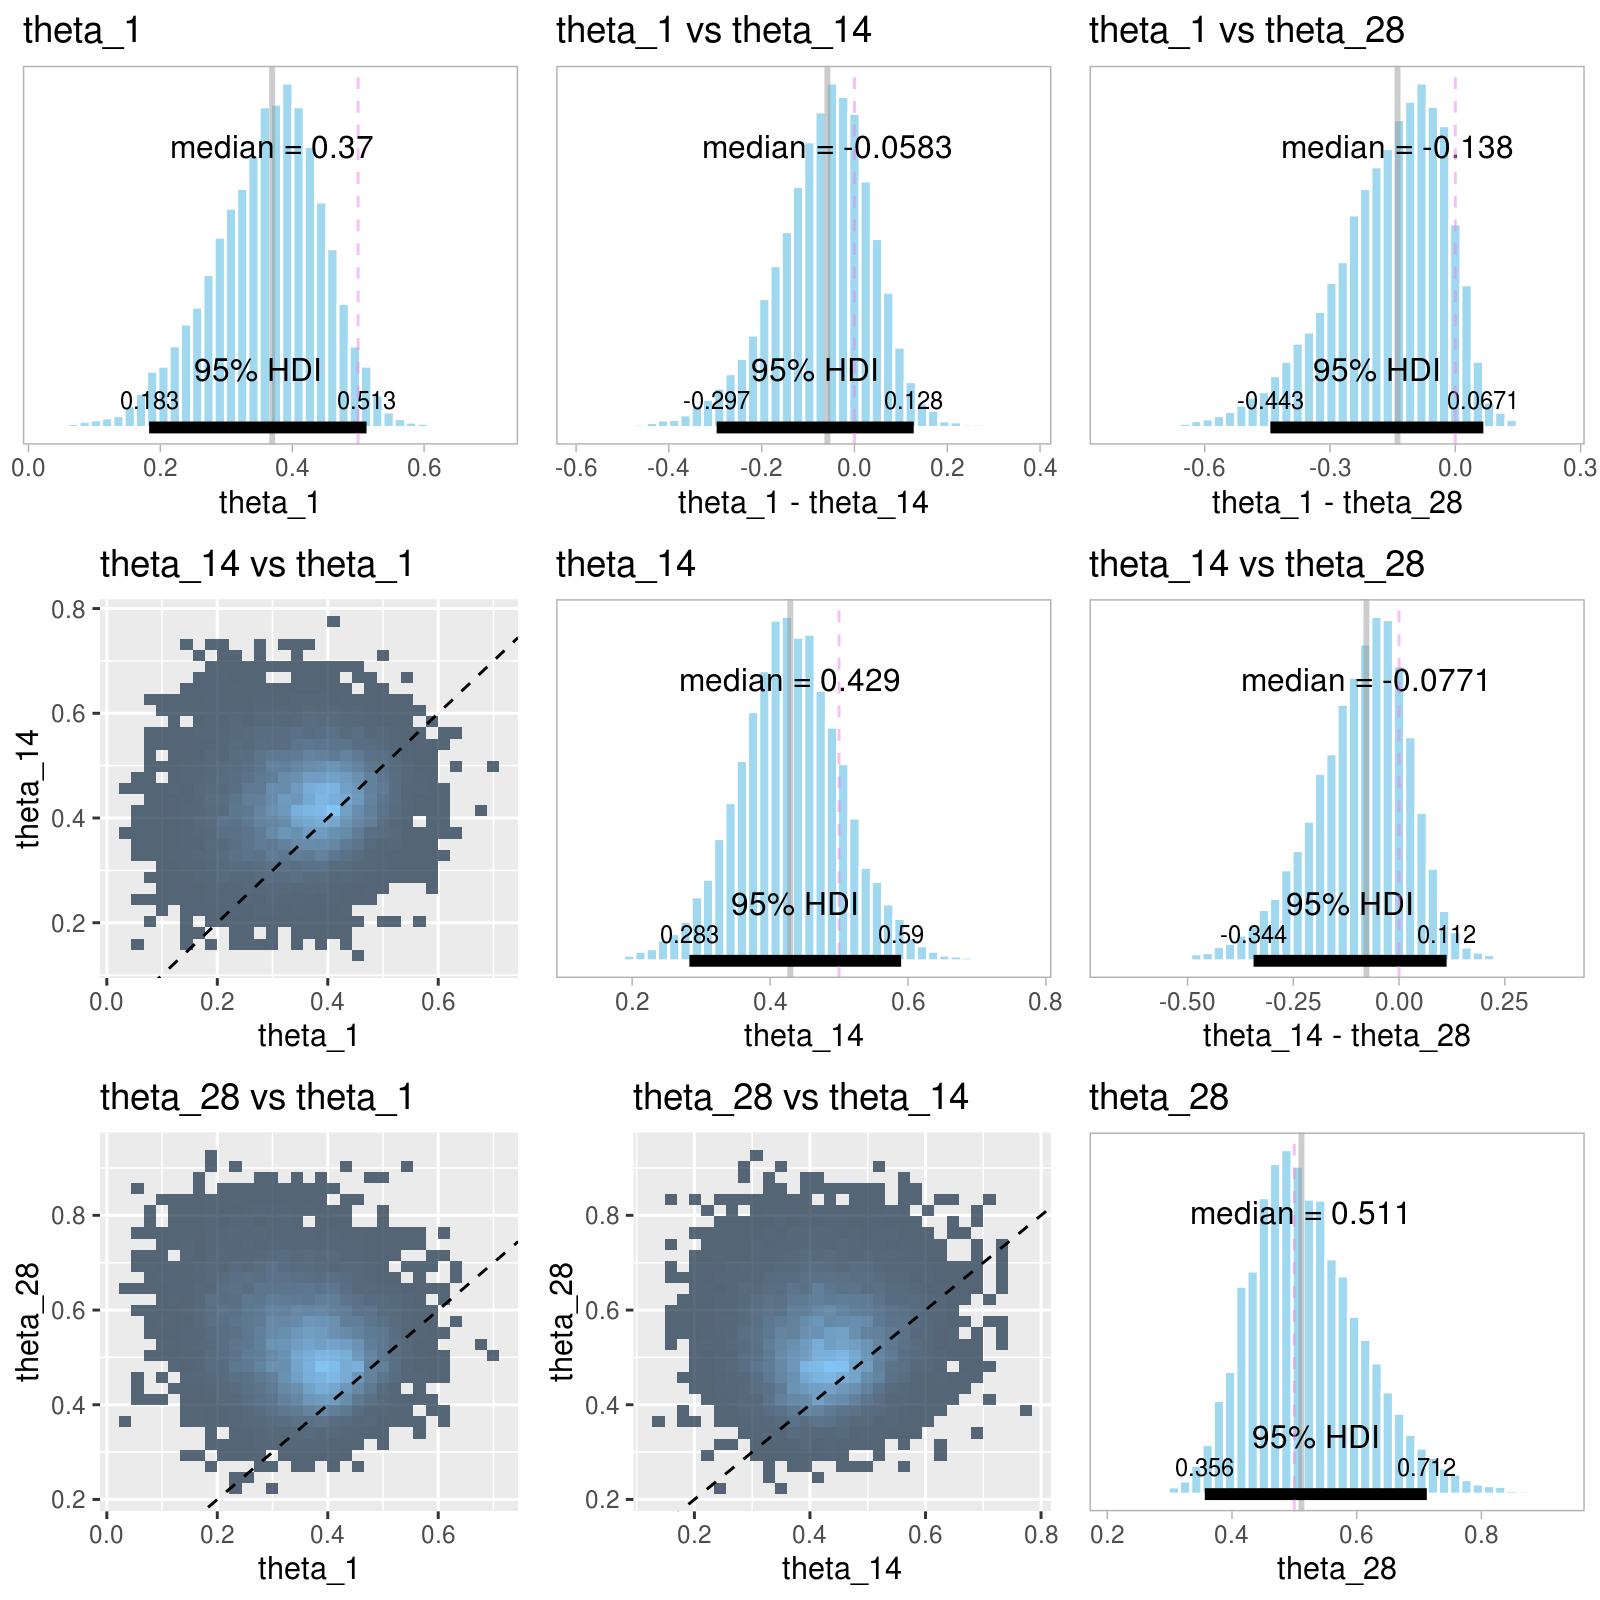

In [21]:
set_plot_size(8, 8)
plot_post_pair_diff(res, c(1, 14, 28), par_prefix = "theta", comp_val = 0.5, mle_func = get_mle)